In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_excel("Q1.xlsx")
X = df.drop("Y", axis=1).values
Y = df["Y"].values

xmin=np.min(X,axis=0)
xmax=np.max(X,axis=0)

X=(X-xmin)/(xmax-xmin)
one = np.ones((X.shape[0],1))

X = np.column_stack((X,one))

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

print(x_train)

[[0.         1.         0.71428571 ... 0.625      0.2        1.        ]
 [0.05555556 0.91666667 0.57142857 ... 0.25       0.4        1.        ]
 [0.77777778 0.16666667 0.42857143 ... 0.625      1.         1.        ]
 ...
 [0.25       0.66666667 0.14285714 ... 0.25       1.         1.        ]
 [1.         0.         0.28571429 ... 0.625      0.8        1.        ]
 [0.77777778 0.16666667 0.42857143 ... 0.25       0.4        1.        ]]


a)

In [75]:
# (a) closed form solution Q∗ =(X.T@X)^(−1)@X.T@y

def closed_sol(X,Y):
    Q = np.linalg.pinv(X.T@X)@(X.T@Y) # why pinv and not inv
    return Q

q_train = closed_sol(x_train,y_train)

def loss_fn(x,y,q):
    y_hat = x@q

    difference = (y - y_hat)**2
    error = 0
    for i in difference:
        error += i
    error /= len(x)

    return error

tr_error = loss_fn(x_train,y_train,q_train)
v_error = loss_fn(x_val,y_val,q_train)
te_error = loss_fn(x_test,y_test,q_train)

print("train_error: ",tr_error)
print("validation_error: ",v_error)
print("test_error: ",te_error)

train_error:  8.396083444368166
validation_error:  9.995006450591275
test_error:  7.69398656920411


In [76]:
import matplotlib.pyplot as plt

In [83]:
def linear_regression(x,y,lr,epoch):
    w = np.zeros(9)
    m = x.shape[0]
    print(m)
    grad_mag = []

    for n in range(epoch):
        y_hat = x @ w
        grad = (-2/m) * (x.T @ (y - y_hat))  # Gradient vector
        grad_mag.append(np.linalg.norm(grad))  # Store magnitude
        w = w - lr * grad

        
        error = np.mean((w@x.T - y)**2)
        print(f"epoch {n+1}, error:  ", error)

    return w,grad_mag

In [104]:
epochs = 100000
w,grad_mag = linear_regression(x_train,y_train,0.1,epochs)

537
epoch 1, error:   142.9257589147749
epoch 2, error:   75.29388179587829
epoch 3, error:   57.87290805385062
epoch 4, error:   48.62117416840969
epoch 5, error:   41.82424072769715
epoch 6, error:   36.46269029328766
epoch 7, error:   32.17488051902141
epoch 8, error:   28.73102917033171
epoch 9, error:   25.956316126113745
epoch 10, error:   23.71315709218383
epoch 11, error:   21.892654815013106
epoch 12, error:   20.408527643733468
epoch 13, error:   19.19239079096107
epoch 14, error:   18.190031247439357
epoch 15, error:   17.358459622615342
epoch 16, error:   16.663575897596388
epoch 17, error:   16.078321110535793
epoch 18, error:   15.581213780546296
epoch 19, error:   15.155190963859699
epoch 20, error:   14.786690517393712
epoch 21, error:   14.464924351033742
epoch 22, error:   14.181302906110105
epoch 23, error:   13.92897937655594
epoch 24, error:   13.702488744417824
epoch 25, error:   13.497461891688783
epoch 26, error:   13.310399160035777
epoch 27, error:   13.138490

In [105]:
print(w)
print(q_train)

[-22.84643763 -11.40021709   2.49089164 -10.43372692  14.47558672
  -0.07015746   7.97159954   1.15410825  30.16765212]
[-22.99386966 -11.50242532   2.4648666  -10.50780749  14.43927037
  -0.07073894   7.97066595   1.15366389  30.35645131]


In [106]:
def mse(x, y, w):
    return np.mean((x @ w - y)**2)

gd_train_error = mse(x_train, y_train, w)
gd_val_error = mse(x_val, y_val, w)
gd_test_error = mse(x_test, y_test, w)

print("Gradient Descent train_error: ", gd_train_error)
print("Gradient Descent validation_error: ", gd_val_error)
print("Gradient Descent test_error: ", gd_test_error)

Gradient Descent train_error:  8.396102029233791
Gradient Descent validation_error:  9.994279039801716
Gradient Descent test_error:  7.695270424555996


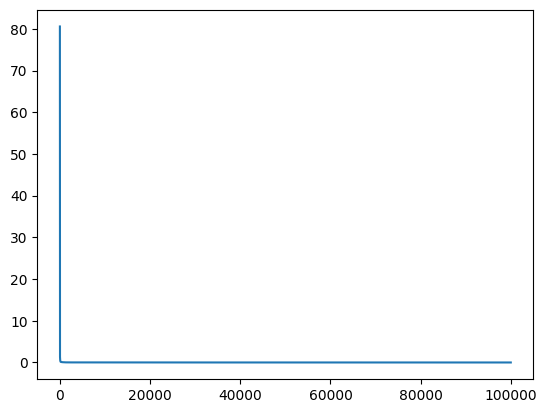

In [107]:
epochs = np.arange(epochs)
plt.plot(epochs,grad_mag)